In [5]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import requests
import csv
import play_scraper as gp
from pprint import pprint

In [6]:
# a complete list of categories for the google play store
categories = ["GAME_ACTION", "GAME_ADVENTURE",
              "GAME_ARCADE", "GAME_BOARD", 
              "GAME_CARD", "GAME_CASINO",
              "GAME_CASUAL", "GAME_EDUCATIONAL",
              "GAME_MUSIC",  "GAME_PUZZLE",
              "GAME_RACING", "GAME_ROLE_PLAYING",
              "GAME_SIMULATION", "GAME_SPORTS",
              "GAME_STRATEGY", "GAME_TRIVIA",
              "GAME_WORD"]

# Empty lists to put the game id (and game category for later).
game_category = []
game_list = []

# Grabs a list of the top 25 paid games in each category.
for x in categories:
    paid_games = gp.collection(collection='TOP_PAID', category=x, results=25)
    print(f' --')
    print(f'   *** Getting information for games in the {x} category. ***')
    print(f' --')
    for j in range (0, 25):
        game_info = paid_games[j]['app_id']
        title = paid_games[j]['title']
        game_category.append(x)
        game_list.append(game_info)
        print(f'{j}. Getting the Game ID for {title}.')
print(f' --')
print(f'All done! The loop collected a total of {len(game_list)} game titles.')
print(f' --')

 --
   *** Getting information for games in the GAME_ACTION category. ***
 --
0. Getting the Game ID for Grand Theft Auto: San Andreas.
1. Getting the Game ID for Five Nights at Freddy's.
2. Getting the Game ID for Hitman Sniper.
3. Getting the Game ID for Five Nights at Freddy's: SL.
4. Getting the Game ID for Assassin's Creed Identity.
5. Getting the Game ID for Five Nights at Freddy's 4.
6. Getting the Game ID for Call of Duty:Black Ops Zombies.
7. Getting the Game ID for Grand Theft Auto III.
8. Getting the Game ID for Teen Titans GO Figure!.
9. Getting the Game ID for Downwell.
10. Getting the Game ID for Real Steel.
11. Getting the Game ID for Bully: Anniversary Edition.
12. Getting the Game ID for Five Nights at Freddy's 3.
13. Getting the Game ID for LEGO ® Marvel Super Heroes.
14. Getting the Game ID for Bloons Supermonkey 2.
15. Getting the Game ID for GTA: Chinatown Wars.
16. Getting the Game ID for Zombieville USA 2.
17. Getting the Game ID for Stickman Ghost 2: Gun Sword -

 --
   *** Getting information for games in the GAME_EDUCATIONAL category. ***
 --
0. Getting the Game ID for Teach Your Monster to Read - Phonics and Reading.
1. Getting the Game ID for Toca Blocks.
2. Getting the Game ID for Explore Daniel's Neighborhood.
3. Getting the Game ID for Toca Boo.
4. Getting the Game ID for My Town : Hospital.
5. Getting the Game ID for Peppa Pig: Holiday.
6. Getting the Game ID for My City : Office.
7. Getting the Game ID for Toca Lab: Plants.
8. Getting the Game ID for My Town : Airport.
9. Getting the Game ID for Toca Mystery House.
10. Getting the Game ID for PAW Patrol Air and Sea Adventures.
11. Getting the Game ID for My Town : Best Friends' House.
12. Getting the Game ID for Daniel Tiger's Stop & Go Potty.
13. Getting the Game ID for My City : Dentist visit.
14. Getting the Game ID for My City : Home.
15. Getting the Game ID for Learn to Read with Tommy Turtle.
16. Getting the Game ID for My Town : ICEME Amusement Park.
17. Getting the Game ID for 

 --
   *** Getting information for games in the GAME_STRATEGY category. ***
 --
0. Getting the Game ID for Bloons TD 6.
1. Getting the Game ID for Kingdom Rush Vengeance.
2. Getting the Game ID for Bloons TD 5.
3. Getting the Game ID for The Escapists: Prison Escape.
4. Getting the Game ID for Papa's Freezeria To Go!.
5. Getting the Game ID for Rusted Warfare - RTS Strategy.
6. Getting the Game ID for Five Nights at Freddy's 2.
7. Getting the Game ID for ROME: Total War.
8. Getting the Game ID for Age of Civilizations II.
9. Getting the Game ID for Civilization Revolution 2.
10. Getting the Game ID for First Strike: Final Hour.
11. Getting the Game ID for Kingdom Rush Frontiers.
12. Getting the Game ID for Papa's Scooperia To Go!.
13. Getting the Game ID for Dungeon Maker.
14. Getting the Game ID for Papa's Pancakeria To Go!.
15. Getting the Game ID for Papa's Burgeria To Go!.
16. Getting the Game ID for XCOM®: Enemy Within.
17. Getting the Game ID for Papa's Pizzeria To Go!.
18. Getti

In [7]:
print(len(game_list))

425


In [8]:
# Empty lists to store the information we want
game_titles = []
game_scores = []
game_reviews = []
game_prices = []
game_installs = []
game_developers = []
game_urls = []

# Loops through the game id's that we gathered in the loop above and puts it into the lists we created 
i = 0
for game in game_list:
    game_details = gp.details(game_list[i])
    title_info = game_details['title']
    game_titles.append(title_info)
    game_scores.append(game_details['score'])
    game_reviews.append(game_details['reviews'])
    game_prices.append(game_details['price'])
    game_installs.append(game_details['installs'])
    game_developers.append(game_details['developer'])
    game_urls.append(game_details['url'])
    print(f'Getting information for {title_info}.')
    i += 1
print(f'All done! The loop processed a total of {len(game_titles)} results.')

Getting information for Grand Theft Auto: San Andreas.
Getting information for Five Nights at Freddy's.
Getting information for Hitman Sniper.
Getting information for Five Nights at Freddy's: SL.
Getting information for Assassin's Creed Identity.
Getting information for Five Nights at Freddy's 4.
Getting information for Call of Duty:Black Ops Zombies.
Getting information for Grand Theft Auto III.
Getting information for Teen Titans GO Figure!.
Getting information for Downwell.
Getting information for Real Steel.
Getting information for Bully: Anniversary Edition.
Getting information for Five Nights at Freddy's 3.
Getting information for LEGO ® Marvel Super Heroes.
Getting information for Bloons Supermonkey 2.
Getting information for GTA: Chinatown Wars.
Getting information for Zombieville USA 2.
Getting information for Stickman Ghost 2: Gun Sword - Shadow Action RPG.
Getting information for LEGO® Star Wars™:  TCS.
Getting information for Goat Simulator GoatZ.
Getting information for PP

Getting information for Peppa Pig: Holiday.
Getting information for My City : Office.
Getting information for Toca Lab: Plants.
Getting information for My Town : Airport.
Getting information for Toca Mystery House.
Getting information for PAW Patrol Air and Sea Adventures.
Getting information for My Town : Best Friends' House.
Getting information for Daniel Tiger's Stop & Go Potty.
Getting information for My City : Dentist visit.
Getting information for My City : Home.
Getting information for Learn to Read with Tommy Turtle.
Getting information for My Town : ICEME Amusement Park.
Getting information for Wild Kratts Rescue Run.
Getting information for My Town : Grandparents.
Getting information for Dr. Panda Restaurant 2.
Getting information for Second Grade Learning Games.
Getting information for BRIO World - Railway.
Getting information for My Town : Hotel.
Getting information for My Town : School.
Getting information for Stack the States® 2.
Getting information for Cytus II.
Getting 

Getting information for Papa's Scooperia To Go!.
Getting information for Dungeon Maker.
Getting information for Papa's Pancakeria To Go!.
Getting information for Papa's Burgeria To Go!.
Getting information for XCOM®: Enemy Within.
Getting information for Papa's Pizzeria To Go!.
Getting information for Slay.
Getting information for Kingdom Rush Origins.
Getting information for Door Kickers.
Getting information for Iron Marines.
Getting information for Organ Trail: Director's Cut.
Getting information for Uciana.
Getting information for Teeny Titans - Teen Titans Go!.
Getting information for Trivia Crack (No Ads).
Getting information for BLeBRiTY.
Getting information for Sporcle.
Getting information for The Jackbox Party Pack.
Getting information for The Jackbox Party Pack 3.
Getting information for Bible Bowl Prep 2019.
Getting information for The Jackbox Party Pack 5.
Getting information for The Jackbox Party Pack 4.
Getting information for HQ Trivia Helper Unlimited.
Getting informatio

In [9]:
# Combines the lists above into a nice, tidy data frame
games_master = {
    "Game Title": game_titles,
    "Game Category": game_category,
    "Game Score": game_scores,
    "Number of Reviews": game_reviews,
    "Price": game_prices,
    "Number of Installs": game_installs,
    "Developer": game_developers,
    "Play Store URL": game_urls
    
}
games_df = pd.DataFrame(games_master)
games_df.head()

,Game Title,Game Category,Game Score,Number of Reviews,Price,Number of Installs,Developer,Play Store URL
0,Grand Theft Auto: San Andreas,GAME_ACTION,4.3,386818,$6.99,"1,000,000+",Rockstar Games,https://play.google.com/store/apps/details?id=...
1,Five Nights at Freddy's,GAME_ACTION,4.6,103753,$2.99,"1,000,000+",Scott Cawthon,https://play.google.com/store/apps/details?id=...
2,Hitman Sniper,GAME_ACTION,4.6,590129,$0.99,"10,000,000+",SQUARE ENIX Ltd,https://play.google.com/store/apps/details?id=...
3,Five Nights at Freddy's: SL,GAME_ACTION,4.5,17305,$2.99,"100,000+",Scott Cawthon,https://play.google.com/store/apps/details?id=...
4,Assassin's Creed Identity,GAME_ACTION,3.8,49893,$1.99,"500,000+",Ubisoft Entertainment,https://play.google.com/store/apps/details?id=...


In [10]:
# check the data types
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 8 columns):
Game Title            425 non-null object
Game Category         425 non-null object
Game Score            418 non-null object
Number of Reviews     425 non-null int64
Price                 425 non-null object
Number of Installs    425 non-null object
Developer             425 non-null object
Play Store URL        425 non-null object
dtypes: int64(1), object(7)
memory usage: 26.6+ KB


In [11]:
# Cleans up and formats the data
games_df['Number of Installs'] = games_df['Number of Installs'].str.replace('+', '')
games_df['Number of Installs'] = games_df['Number of Installs'].str.replace(',', '')
games_df['Number of Installs'] = pd.to_numeric(games_df['Number of Installs'], errors='coerce')
games_df['Game Score'] = pd.to_numeric(games_df['Game Score'], errors='coerce')
games_df['Price'] = games_df['Price'].str.replace('$', '')
games_df['Price'] = pd.to_numeric(games_df['Price'], errors='coerce')
games_df.head()

,Game Title,Game Category,Game Score,Number of Reviews,Price,Number of Installs,Developer,Play Store URL
0,Grand Theft Auto: San Andreas,GAME_ACTION,4.3,386818,6.99,1000000,Rockstar Games,https://play.google.com/store/apps/details?id=...
1,Five Nights at Freddy's,GAME_ACTION,4.6,103753,2.99,1000000,Scott Cawthon,https://play.google.com/store/apps/details?id=...
2,Hitman Sniper,GAME_ACTION,4.6,590129,0.99,10000000,SQUARE ENIX Ltd,https://play.google.com/store/apps/details?id=...
3,Five Nights at Freddy's: SL,GAME_ACTION,4.5,17305,2.99,100000,Scott Cawthon,https://play.google.com/store/apps/details?id=...
4,Assassin's Creed Identity,GAME_ACTION,3.8,49893,1.99,500000,Ubisoft Entertainment,https://play.google.com/store/apps/details?id=...


In [12]:
games_df["Total Download Revenue ($)"] = games_df["Price"]*games_df["Number of Installs"]

In [13]:
games_df.dtypes

Game Title                     object
Game Category                  object
Game Score                    float64
Number of Reviews               int64
Price                         float64
Number of Installs              int64
Developer                      object
Play Store URL                 object
Total Download Revenue ($)    float64
dtype: object

In [14]:
#segregating the data by category from main DF

arcade_game = games_df.loc[games_df["Game Category"]=="GAME_ARCADE"]
sports_game = games_df.loc[games_df["Game Category"]=="GAME_SPORTS"]
racing_game = games_df.loc[games_df["Game Category"]=="GAME_RACING"]
music_game = games_df.loc[games_df["Game Category"]=="GAME_MUSIC"]
educational_game = games_df.loc[games_df["Game Category"]== "GAME_EDUCATIONAL"]
board_game = games_df.loc[games_df["Game Category"]=="GAME_BOARD"]
casino_game = games_df.loc[games_df["Game Category"]=="GAME_CASINO"]
action_game = games_df.loc[games_df["Game Category"]=="GAME_ACTION"]
trivia_game = games_df.loc[games_df["Game Category"]=="GAME_TRIVIA"]
simulation_game = games_df.loc[games_df["Game Category"]=="GAME_SIMULATION"]
adventure_game = games_df.loc[games_df["Game Category"]=="GAME_ADVENTURE"]
puzzle_game = games_df.loc[games_df["Game Category"]=="GAME_PUZZLE"]
card_game = games_df.loc[games_df["Game Category"]=="GAME_CARD"]
casual_game = games_df.loc[games_df["Game Category"]=="GAME_CASUAL"]
strategy_game = games_df.loc[games_df["Game Category"]=="GAME_STRATEGY"]                       
roleplay_game = games_df.loc[games_df["Game Category"]=="GAME_ROLE_PLAYING"]
word_game = games_df.loc[games_df["Game Category"]=="GAME_WORD"]

In [15]:
# Although action game and arcade games receive similar amount of dls, arcade games receives 3x of
# total revenue. Therefore, based on the finding from Greg's group_sums and game_inst_sums DFs,
# it appears arcade_game generates most of the revenue out of all sub-catergories. The analysis from here will be
# focusing on arcade catergory only.

arcade_game = arcade_game.sort_values(by='Total Download Revenue ($)', ascending=False)

In [16]:
arcade_game

,Game Title,Game Category,Game Score,Number of Reviews,Price,Number of Installs,Developer,Play Store URL,Total Download Revenue ($)
50,Minecraft,GAME_ARCADE,4.5,2590955,6.99,10000000,Mojang,https://play.google.com/store/apps/details?id=...,69900000.0
52,Grand Theft Auto: Vice City,GAME_ARCADE,4.3,131956,4.99,1000000,Rockstar Games,https://play.google.com/store/apps/details?id=...,4990000.0
64,Worms 3,GAME_ARCADE,4.2,67889,4.99,1000000,Team 17 Digital Limited,https://play.google.com/store/apps/details?id=...,4990000.0
59,SuperRetro16 ( SNES Emulator ),GAME_ARCADE,4.3,38543,3.99,1000000,Neutron Emulation,https://play.google.com/store/apps/details?id=...,3990000.0
51,Geometry Dash,GAME_ARCADE,4.8,650968,1.99,1000000,RobTop Games,https://play.google.com/store/apps/details?id=...,1990000.0
53,ePSXe for Android,GAME_ARCADE,4.5,35018,3.75,500000,epsxe software s.l.,https://play.google.com/store/apps/details?id=...,1875000.0
54,Fruit Ninja Classic,GAME_ARCADE,4.3,85886,0.99,1000000,Halfbrick Studios,https://play.google.com/store/apps/details?id=...,990000.0
69,The Impossible Game,GAME_ARCADE,4.1,19823,0.99,500000,FlukeDude,https://play.google.com/store/apps/details?id=...,495000.0
60,Vector Full,GAME_ARCADE,4.2,35907,0.99,500000,NEKKI,https://play.google.com/store/apps/details?id=...,495000.0
74,Backflip Madness,GAME_ARCADE,4.3,26426,0.99,500000,Gamesoul Studio,https://play.google.com/store/apps/details?id=...,495000.0


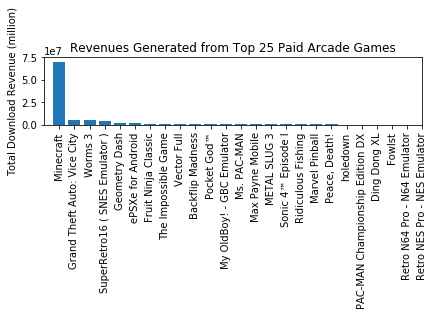

In [38]:
#bar cart by revenue.
tick_location = np.arange(len(arcade_game))
plt.bar(tick_location,arcade_game["Total Download Revenue ($)"], align="center")
plt.xticks(tick_location,arcade_game["Game Title"], rotation=90)
plt.xticks()
plt.title("Revenues Generated from Top 25 Paid Arcade Games")
plt.xlim(-1, len(arcade_game)-1)
plt.ylim(0,max(arcade_game["Total Download Revenue ($)"]+5000000))
plt.ylabel("Total Download Revenue (million)")
plt.tight_layout()

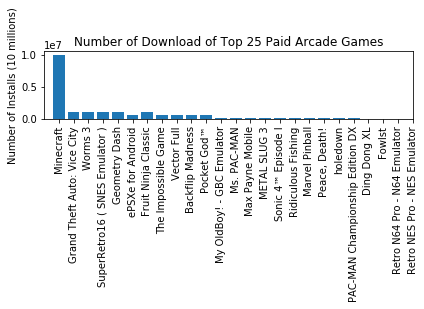

In [45]:
#bar cart by # of dl.
tick_location = np.arange(len(arcade_game))
plt.bar(tick_location,arcade_game["Number of Installs"], align="center")
plt.xticks(tick_location,arcade_game["Game Title"], rotation=90)
plt.xlim(-1, len(arcade_game)-1)
plt.ylim(0,max(arcade_game["Number of Installs"]+500000))
plt.ylabel("Number of Installs (10 millions)")
plt.title("Number of Download of Top 25 Paid Arcade Games")
plt.tight_layout()

In [19]:
# in comparsion, let's extract 3 top paid games from each catergory
top_games = games_df.groupby('Game Category', group_keys=False).apply(lambda x: x.nlargest(3, 'Total Download Revenue ($)'))

In [20]:
top_games = top_games.sort_values(by='Total Download Revenue ($)', ascending=False)
top_games

,Game Title,Game Category,Game Score,Number of Reviews,Price,Number of Installs,Developer,Play Store URL,Total Download Revenue ($)
50,Minecraft,GAME_ARCADE,4.5,2590955,6.99,10000000,Mojang,https://play.google.com/store/apps/details?id=...,69900000.0
2,Hitman Sniper,GAME_ACTION,4.6,590129,0.99,10000000,SQUARE ENIX Ltd,https://play.google.com/store/apps/details?id=...,9900000.0
398,QuizClash™ PREMIUM,GAME_TRIVIA,4.2,90894,8.99,1000000,FEO,https://play.google.com/store/apps/details?id=...,8990000.0
0,Grand Theft Auto: San Andreas,GAME_ACTION,4.3,386818,6.99,1000000,Rockstar Games,https://play.google.com/store/apps/details?id=...,6990000.0
52,Grand Theft Auto: Vice City,GAME_ARCADE,4.3,131956,4.99,1000000,Rockstar Games,https://play.google.com/store/apps/details?id=...,4990000.0
251,Need for Speed Most Wanted,GAME_RACING,3.9,44734,4.99,1000000,ELECTRONIC ARTS,https://play.google.com/store/apps/details?id=...,4990000.0
64,Worms 3,GAME_ARCADE,4.2,67889,4.99,1000000,Team 17 Digital Limited,https://play.google.com/store/apps/details?id=...,4990000.0
305,Goat Simulator,GAME_SIMULATION,4.3,100951,4.99,1000000,Coffee Stain Publishing,https://play.google.com/store/apps/details?id=...,4990000.0
7,Grand Theft Auto III,GAME_ACTION,4.0,96596,4.99,1000000,Rockstar Games,https://play.google.com/store/apps/details?id=...,4990000.0
25,Terraria.,GAME_ADVENTURE,4.3,231125,4.99,1000000,505 Games Srl,https://play.google.com/store/apps/details?id=...,4990000.0


In [21]:
#showing the data with a scatter plot

arcade = top_games.loc[top_games["Game Category"]=="GAME_ARCADE"]
sports = top_games.loc[top_games["Game Category"]=="GAME_SPORTS"]
racing = top_games.loc[top_games["Game Category"]=="GAME_RACING"]
music = top_games.loc[top_games["Game Category"]=="GAME_MUSIC"]
educational = top_games.loc[top_games["Game Category"]== "GAME_EDUCATIONAL"]
board = top_games.loc[top_games["Game Category"]=="GAME_BOARD"]
casino = top_games.loc[top_games["Game Category"]=="GAME_CASINO"]
action = top_games.loc[top_games["Game Category"]=="GAME_ACTION"]
trivia = top_games.loc[top_games["Game Category"]=="GAME_TRIVIA"]
simulation = top_games.loc[top_games["Game Category"]=="GAME_SIMULATION"]
adventure = top_games.loc[top_games["Game Category"]=="GAME_ADVENTURE"]
puzzle = top_games.loc[top_games["Game Category"]=="GAME_PUZZLE"]
card = top_games.loc[top_games["Game Category"]=="GAME_CARD"]
casual = top_games.loc[top_games["Game Category"]=="GAME_CASUAL"]
strategy = top_games.loc[top_games["Game Category"]=="GAME_STRATEGY"]                       
roleplay = top_games.loc[top_games["Game Category"]=="GAME_ROLE_PLAYING"]
word = top_games.loc[top_games["Game Category"]=="GAME_WORD"]

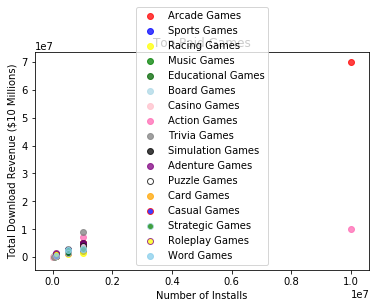

In [66]:
#building scatter plots for each category
arcade_p = plt.scatter(arcade["Number of Installs"], arcade["Total Download Revenue ($)"], marker="o"
                       , label="Arcade Games", color="red", alpha=0.75)
sports_p = plt.scatter(sports["Number of Installs"], sports["Total Download Revenue ($)"], marker="o",
                        label="Sports Games", color="blue", alpha=0.75)
racing_p = plt.scatter(racing["Number of Installs"], racing["Total Download Revenue ($)"], marker="o",
                        label="Racing Games", color="yellow", alpha=0.75)
music_p = plt.scatter(music["Number of Installs"], music["Total Download Revenue ($)"], marker="o",
                        label="Music Games", color="green", alpha=0.75)
educational_p = plt.scatter(educational["Number of Installs"], educational["Total Download Revenue ($)"],
                            marker="o",label="Educational Games", color="darkgreen", alpha=0.75)
board_p = plt.scatter(board["Number of Installs"], board["Total Download Revenue ($)"], marker="o",
                       label="Board Games", color="lightblue", alpha=0.75)
casino_p = plt.scatter(casino["Number of Installs"], casino["Total Download Revenue ($)"], marker="o",
                       label="Casino Games", color="pink", alpha=0.75)
action_p = plt.scatter(action["Number of Installs"], action["Total Download Revenue ($)"], marker="o",
                       label="Action Games", color="hotpink", alpha=0.75)
trivia_p = plt.scatter(trivia["Number of Installs"], trivia["Total Download Revenue ($)"], marker="o",
                       label="Trivia Games", color="grey", alpha=0.75)
simulation_p = plt.scatter(simulation["Number of Installs"], simulation["Total Download Revenue ($)"], marker="o",
                       label="Simulation Games", color="black", alpha=0.75)
adventure_p = plt.scatter(adventure["Number of Installs"], adventure["Total Download Revenue ($)"], marker="o",
                       label="Adenture Games", color="purple", alpha=0.75)
puzzle_p = plt.scatter(puzzle["Number of Installs"], puzzle["Total Download Revenue ($)"], marker="o",
                        label="Puzzle Games", color="white", edgecolor="black",alpha=0.75)
card_p = plt.scatter(card["Number of Installs"], card["Total Download Revenue ($)"], marker="o",
                       label="Card Games", color="orange", alpha=0.75)
casual_p = plt.scatter(casual["Number of Installs"], casual["Total Download Revenue ($)"], marker="o",
                       label="Casual Games", color="blue",edgecolor="red", alpha=0.75)
strategy_p = plt.scatter(strategy["Number of Installs"], strategy["Total Download Revenue ($)"], marker="o",
                       label="Strategic Games", color="green", edgecolor="lightblue", alpha=0.75)
roleplay_p = plt.scatter(roleplay["Number of Installs"], roleplay["Total Download Revenue ($)"], marker="o",
                       label="Roleplay Games", color="yellow", edgecolor="purple", alpha=0.75)
word_p = plt.scatter(word["Number of Installs"], word["Total Download Revenue ($)"], marker="o",
                       label="Word Games", color="skyblue", alpha=0.75)

#labeling the graph
plt.xlabel("Number of Installs")
plt.ylabel("Total Download Revenue ($10 Millions)")
plt.title("Top Paid Games")
#plt.legend((arcade_p,sports_p,racing_p,music_p,educational_p,board_p,casino_p,action_p,trivia_p,simulation_p,
           #adventure_p,puzzle_p,card_p,casual_p,strategy_p,roleplay_p,word_p),
           #("Arcade","Sports","Racing","Music","Education","Board","Casino","Action","Trivia","Simulation",
           #"Adventure","Puzzle","Card","Casual","Strategic","Roleplay","Word"))
plt.legend(loc="best")